# Linear Regression Practice

In this lab we are going to use a 1994 dataset that has detailed prices on items sold at over 400 Burguer King, Wendy's, KFC and Roy Roger restaurants in New Jersey and Pennsivania.

Roy Roger https://en.wikipedia.org/wiki/Roy_Rogers_Restaurants


The data set has zip-code level data on various items prices, characterisitics of the zip code population.

The idea with this exercise is to see wheter fast-food restaurants charge higher prices in areas with a larger concentration of African Americans. 

### Data Set Characteristics:  
K. Graddy (1997), "Do Fast-Food Chains Price Discriminate on the Race and Income Characteristics of an Area?" Journal of Business and Economic Statistics 15, 391-401.
http://people.brandeis.edu/~kgraddy/published%20papers/GraddyK_jbes1997.pdf

    :Number of Instances: 410
    
    :Attribute Information
    
    psoda         price of medium soda, 1st wave
    pfries        price of small fries, 1st wave
    pentree       price entree (burger or chicken), 1st wave
    wagest        starting wage, 1st wave
    nmgrs         number of managers, 1st wave
    nregs         number of registers, 1st wave
    hrsopen       hours open, 1st wave
    emp           number of employees, 1st wave
    psoda2        price of medium soday, 2nd wave
    pfries2       price of small fries, 2nd wave
    pentree2      price entree, 2nd wave
    wagest2       starting wage, 2nd wave
    nmgrs2        number of managers, 2nd wave
    nregs2        number of registers, 2nd wave
    hrsopen2      hours open, 2nd wave
    emp2          number of employees, 2nd wave
    compown       =1 if company owned
    chain         BK = 1, KFC = 2, Roy Rogers = 3, Wendy's = 4
    density       population density, town
    crmrte        crime rate, town
    state         NJ = 1, PA = 2
    prpblck       proportion black, zipcode
    prppov        proportion in poverty, zipcode
    prpncar       proportion no car, zipcode
    hseval        median housing value, zipcode
    nstores       number of stores, zipcode
    income        median family income, zipcode
    county        county label
    lpsoda        log(psoda)
    lpfries       log(pfries)
    lhseval       log(hseval)
    lincome       log(income)
    ldensity      log(density)
    NJ            =1 for New Jersey
    BK            =1 if Burger King
    KFC           =1 if Kentucky Fried Chicken
    RR            =1 if Roy Rogers


In [1]:
# data modules
import numpy as np
import scipy.stats as stats
import pandas as pd

# plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Stats/Regresions Packages
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# make sure charts appear in the notebook:
%matplotlib inline
%config InlineBackend.figure_format ='retina'

#### 1. Read the data, print the last 5 rows, perform EDA (missing values, data types, describe)

In [3]:
path_to_file = '/../../../../../datasets/fast_food_chains/discrim.csv' ## Change it to your path
fast_food = pd.read_csv(path_to_file)
fast_food.tail(5)

,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,psoda2,pfries2,...,county,lpsoda,lpfries,lhseval,lincome,ldensity,NJ,BK,KFC,RR
405,1.11,1.05,0.94,4.50,3.0,2.0,12.5,10.0,1.11,1.11,...,20,0.104360,0.048790,11.94601,10.90837,7.253400,0,0,0,1
406,0.95,0.74,2.33,4.75,3.0,4.0,10.0,8.0,0.95,0.84,...,20,-0.051293,-0.301105,11.49476,10.61115,8.368465,0,0,1,0
407,0.97,0.84,0.91,4.25,4.0,3.0,18.0,35.0,0.97,0.86,...,20,-0.030459,-0.174353,11.49476,10.61115,8.368465,0,1,0,0
408,0.97,0.86,0.89,4.75,4.0,3.0,17.0,18.5,0.97,0.84,...,20,-0.030459,-0.150823,11.49476,10.61115,8.368465,0,1,0,0
409,1.02,0.89,0.90,4.50,3.0,3.0,15.0,29.0,1.02,0.94,...,3,0.019803,-0.116534,11.68435,10.53148,6.114567,0,1,0,0


In [4]:
fast_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 37 columns):
psoda       402 non-null float64
pfries      393 non-null float64
pentree     398 non-null float64
wagest      390 non-null float64
nmgrs       404 non-null float64
nregs       388 non-null float64
hrsopen     410 non-null float64
emp         404 non-null float64
psoda2      388 non-null float64
pfries2     382 non-null float64
pentree2    386 non-null float64
wagest2     389 non-null float64
nmgrs2      404 non-null float64
nregs2      388 non-null float64
hrsopen2    399 non-null float64
emp2        397 non-null float64
compown     410 non-null int64
chain       410 non-null int64
density     409 non-null float64
crmrte      409 non-null float64
state       410 non-null int64
prpblck     409 non-null float64
prppov      409 non-null float64
prpncar     409 non-null float64
hseval      409 non-null float64
nstores     410 non-null int64
income      409 non-null float64
county      

In [5]:
fast_food.describe().T

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
psoda,402.0,1.044876,0.088687,0.730000,NaN,NaN,NaN,1.490000
pfries,393.0,0.921985,0.105881,0.670000,NaN,NaN,NaN,1.270000
pentree,398.0,1.322186,0.643085,0.490000,NaN,NaN,NaN,3.950000
wagest,390.0,4.615641,0.347015,4.250000,NaN,NaN,NaN,5.750000
nmgrs,404.0,3.420297,1.018408,1.000000,NaN,NaN,NaN,10.000000
nregs,388.0,3.608247,1.243540,1.000000,NaN,NaN,NaN,8.000000
hrsopen,410.0,14.439024,2.809987,7.000000,12.0,15.5,16.0,24.000000
emp,404.0,17.621906,9.423264,3.000000,NaN,NaN,NaN,80.000000
psoda2,388.0,1.044948,0.093567,0.410000,NaN,NaN,NaN,1.400000
pfries2,382.0,0.941230,0.109304,0.690000,NaN,NaN,NaN,1.370000


In [6]:
fast_food.isnull().sum()

psoda        8
pfries      17
pentree     12
wagest      20
nmgrs        6
nregs       22
hrsopen      0
emp          6
psoda2      22
pfries2     28
pentree2    24
wagest2     21
nmgrs2       6
nregs2      22
hrsopen2    11
emp2        13
compown      0
chain        0
density      1
crmrte       1
state        0
prpblck      1
prppov       1
prpncar      1
hseval       1
nstores      0
income       1
county       0
lpsoda       8
lpfries     17
lhseval      1
lincome      1
ldensity     1
NJ           0
BK           0
KFC          0
RR           0
dtype: int64

#### 2. The variable/feature psoda has eight missing observations. Replace those missing observations with the average price of soda per chain ( you will have to find which chain is missing psoda values)

In [7]:
fast_food.loc[fast_food['psoda'].isnull()].T

,57,92,143,183,283,310,361,368
psoda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pfries,1.120000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pentree,1.120000,NaN,0.960000,NaN,NaN,NaN,0.520000,NaN
wagest,4.250000,4.250000,4.250000,4.750000,4.250000,NaN,4.250000,4.870000
nmgrs,5.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000
nregs,6.000000,3.000000,4.000000,3.000000,7.000000,5.000000,4.000000,3.000000
hrsopen,12.500000,17.000000,16.000000,16.000000,17.000000,12.500000,16.500000,18.000000
emp,20.000000,23.000000,17.500000,12.000000,27.500000,20.000000,12.500000,12.500000
psoda2,1.150000,1.160000,1.110000,1.010000,1.050000,1.160000,0.410000,0.970000
pfries2,0.940000,1.220000,1.050000,1.010000,1.000000,1.060000,0.840000,0.840000


In [8]:
print fast_food[fast_food['chain']==1]['psoda'].mean()
print fast_food[fast_food['chain']==3]['psoda'].mean()

1.05421686747
1.10604166667


In [9]:
## Now replace the missing values with their correspondent psoda (mean)
fast_food["psoda"] = fast_food.groupby("chain").transform(lambda x: x.fillna(x.mean()))

In [10]:
## row 310, chain 3
## row 92, chain 1
print fast_food.loc[310]
print fast_food.loc[92]

psoda            1.106042
pfries                NaN
pentree               NaN
wagest                NaN
nmgrs            4.000000
nregs            5.000000
hrsopen         12.500000
emp             20.000000
psoda2           1.160000
pfries2          1.060000
pentree2         1.050000
wagest2          5.050000
nmgrs2           3.000000
nregs2           5.000000
hrsopen2        11.500000
emp2            20.000000
compown          0.000000
chain            3.000000
density       1962.000000
crmrte           0.041586
state            1.000000
prpblck          0.023150
prppov           0.022561
prpncar          0.038316
hseval      188400.000000
nstores          8.000000
income       63905.000000
county          18.000000
lpsoda                NaN
lpfries               NaN
lhseval         12.146320
lincome         11.065150
ldensity         7.581720
NJ               1.000000
BK               0.000000
KFC              0.000000
RR               1.000000
Name: 310, dtype: float64
psoda       

#### 3. In one graph, plot the distribution of 'psoda' for each chain (4 histograms in one graph) add different colors per histogram, label each histogram, locate the legend on the 'upper left' side of your chart. Are there any similarities or differences in their distributions?



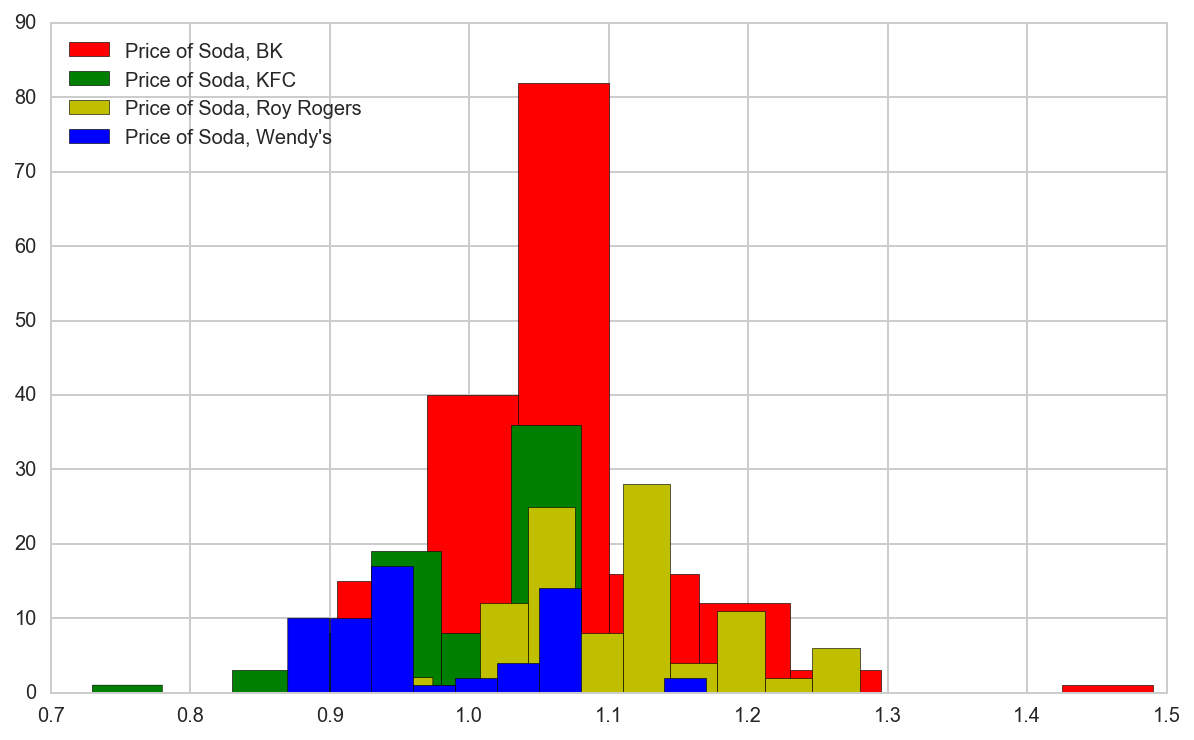

In [11]:
fig = plt.figure(figsize=(10,6))
fast_food[fast_food['chain']==1]['psoda'].hist(color='r', label='Price of Soda, BK')
fast_food[fast_food['chain']==2]['psoda'].hist(color='g', label='Price of Soda, KFC')
fast_food[fast_food['chain']==3]['psoda'].hist(color='y', label='Price of Soda, Roy Rogers')
fast_food[fast_food['chain']==4]['psoda'].hist(color='b', label= "Price of Soda, Wendy's")

plt.legend(loc='upper left')
plt.show()

#### 4. The variable income has one missing value. First, identify to what state "NJ=1 or PA=2" this missing value belongs to. Then drop the "row " that corresponds to this missing value fast_food.drop("row_number", axis=0)

In [12]:
## Corresponds to PA=2
fast_food.loc[fast_food['income'].isnull()]


,psoda,pfries,pentree,wagest,nmgrs,nregs,hrsopen,emp,psoda2,pfries2,...,county,lpsoda,lpfries,lhseval,lincome,ldensity,NJ,BK,KFC,RR
384,1.05,0.9,0.94,4.25,3.0,4.0,16.0,15.0,1.01,1.01,...,4,0.04879,-0.10536,NaN,NaN,6.798498,0,0,0,1


In [13]:
## Dropping the row
fast_food = fast_food.drop(384, axis=0)

#### 5. Graph the distribution of psoda for the entire dataset and include a line for the average in your graph.

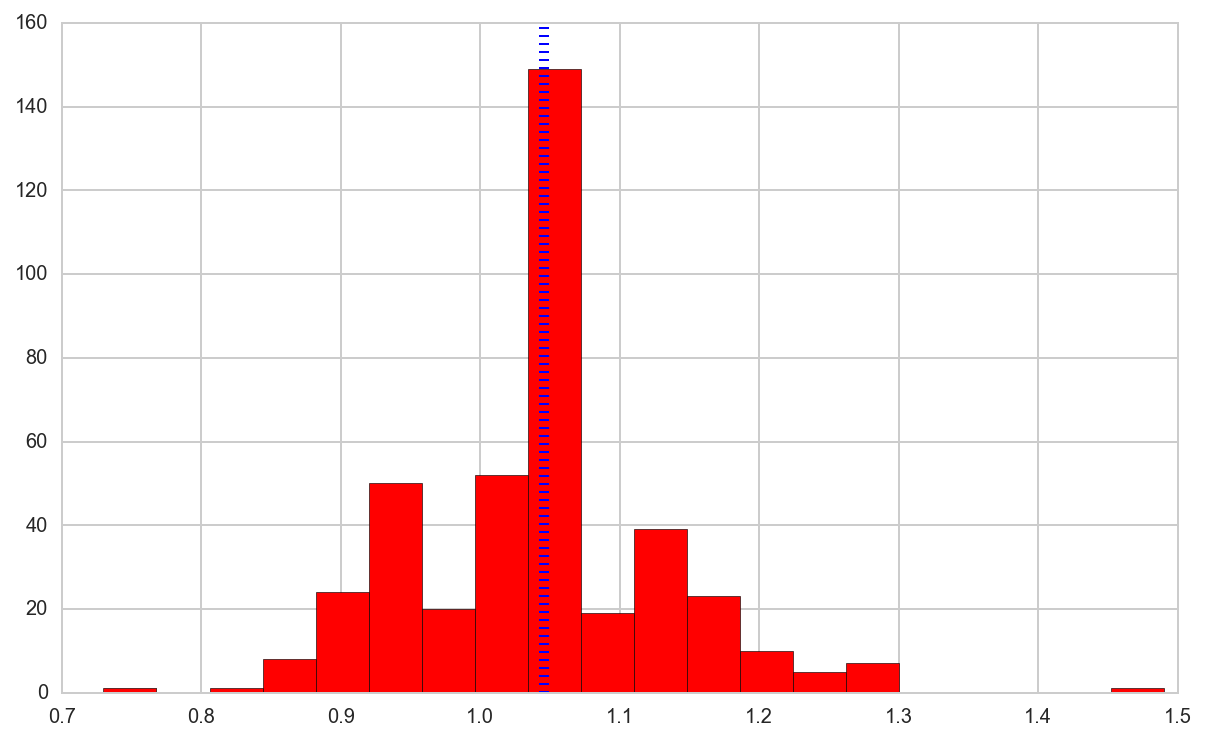

In [14]:
fig = plt.figure(figsize=(10,6))
result = plt.hist(fast_food['psoda'], bins=20, color='r')
plt.axvline(fast_food['psoda'].mean(), color='b', linestyle='dotted', linewidth=5)

#### 6. Find the average values of _prpblck_ and _income_ in the sample, along with their standard deviations. Can you infer the units of measurement of these two variables (Get used to do this, these are your baseline values)

In [15]:
print fast_food['prpblck'].mean()
print fast_food['prpblck'].std()
print fast_food['income'].mean()
print fast_food['income'].std()
print fast_food['psoda'].mean()
print fast_food['psoda'].std()

0.113486395844
0.182416465423
47053.7848411
13179.2860689
1.0454259397
0.0880835416423


### Linear Regressions

#### 7.  Consider a model to explain the price of soda _psoda_, in terms of the proportion of the African American population and the median income
    
    psoda = β0 + β1prpblck + β2income + e


In [16]:
# Define your linear model 
lm = linear_model.LinearRegression() 

# Define the target variable, called it y
target = 'psoda'
y = fast_food[target]
print type(y)



# Define your predictors, called them X
X = fast_food[['prpblck', 'income']]
print type(X)

# Print the shapes of your y and X
print y.shape, X.shape


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
(409,) (409, 2)


In [17]:
# Fit your model
model = lm.fit(X, y)

# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions
predictions = lm.predict(X)
predictions.shape

(409,)

In [18]:
## Is there a difference between the means for actual values (psoda) and your predictions
print fast_food['psoda'].mean()
print predictions.mean()

1.0454259397
1.0454259397


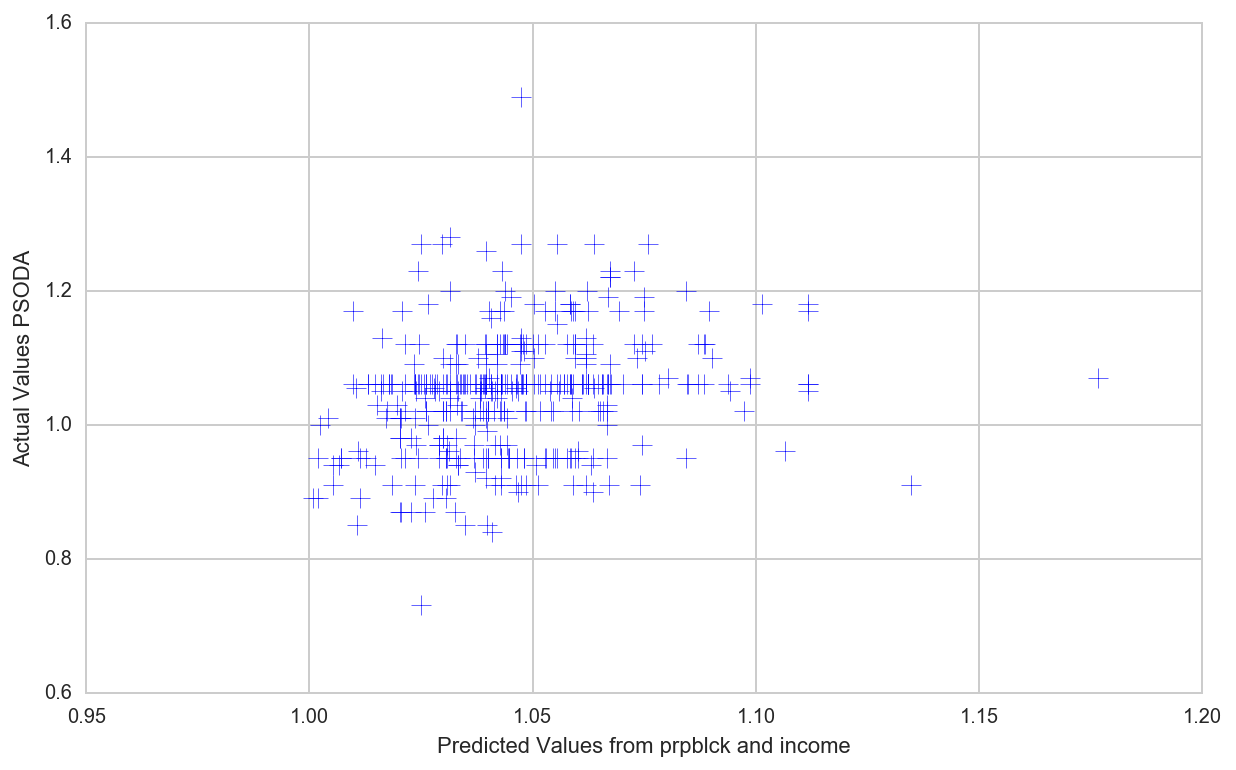

MSE: 0.00724966165558


In [19]:
## Construct a scatter plot of your model. Use your predicted values as your y axis and your y values as your x axis
## Print the Mean Square error see/read this link 
## http://mste.illinois.edu/patel/amar430/meansquare.html

## s = s: size in points, c = color, where s is size, c is color

fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from prpblck and income")
plt.ylabel("Actual Values PSODA")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [20]:
fast_food.shape

(409, 37)

In [21]:
## What is the coefficient of determination (R^2) of the prediction. In other words,what is the accuracy of your model?
score_r2 = model.score(X, y)
score_r2

0.063319785709348486

In [22]:
## Print the estimated coefficients of your model.
model.coef_

array([  1.13185366e-01,   1.59318232e-06])

In [23]:
## What is the intercept of your model.
lm.intercept_

0.95761568241232675

## Write your results in equation form, include the sample size and R^2
psoda = 0.95761568241232675 + (1.13185366e-01)prpblck + (1.59318232e-06)income + e

R^2 = 0.063319785709348486

Sample  = 409

## Interpret the coefficient on prpblck
Holding all other independent variables/features constant, an increase in the "share" of the African American population in our sample, will increase the price of soda to \$1.07 (1.13185366e-01 + 0.95761568241232675). 
This means that from my baseline price of $1.0454259397, the increase is 2.42%


### 8.  Compare the estimate from question 7 with a simple regression estimate from _psoda_ on _prpblck_. Is the discrimination effect larger or smaller when you control/include income on your predictors?
    
    psoda = β0 + β1prpblck + e

In [24]:
# Define your predictors and called them X
X = fast_food[['prpblck']]

# Print the shapes of your y and X
print y.shape, X.shape

(409,) (409, 1)


In [25]:
# Fit your model
model = lm.fit(X, y)

In [26]:
# find the predictors and called them predictions
# print the shape of predictions
predictions = lm.predict(X)
predictions.shape

(409,)

In [27]:
## Is there a difference between the means for actual values (psoda) and your predictions
print fast_food['psoda'].mean()
print predictions.mean()

1.0454259397
1.0454259397


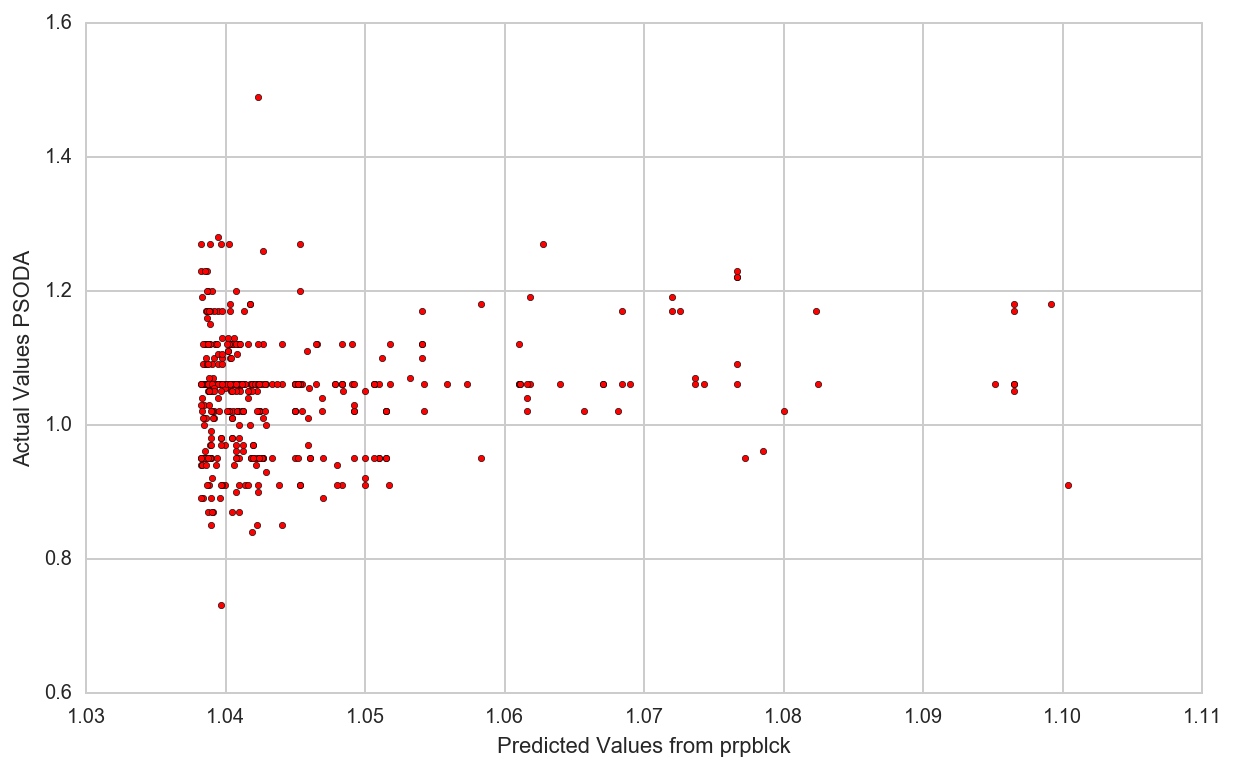

MSE: 0.00760680000723


In [28]:
## Construct a scatter plot of your model. Use your predicted values as your y axis and your y values as your x axis
## Print the Mean Square error 
## s = s: size in points, c = color

fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=10, c='r', marker='o')
plt.xlabel("Predicted Values from prpblck")
plt.ylabel("Actual Values PSODA")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

In [29]:
## What is the accuracy of your model?
score_r2 = model.score(X, y)
score_r2

0.01717633189781409

In [30]:
## Print the estimated coefficients for the linear regression problem
model.coef_

array([ 0.06328429])

In [31]:
## What is the intercept of your model.
lm.intercept_

1.0382440331921921

In [32]:
## Write your results in equation form, include the sample size and R^2

#### 9.  Now Use StatsModel and repeat questions 7 and 8
http://statsmodels.sourceforge.net/devel/example_formulas.html

##### Helpful Notes to Keep in mind:
1. P value for a coefficient says nothing about the size of the effect that variable is having on your dependent variable - it is possible to have a highly significant result (very small P-value) for a miniscule effect.
2. With a P value of 5% (or .05) there is only a 5% chance that results you are seeing would have come up in a 
random distribution, so you can say with a 95% probability of being correct that the variable is having some effect, assuming your model is specified correctly.
3. In simple or multiple linear regression, the size of the coefficient for each independent variable gives you 
the size of the effect that variable is having on your dependent/target (y) variable, and the sign on the coefficient 
(positive or negative) gives you the direction of the effect. In regression with a single independent/predictor variable, the coefficient tells you how much the dependent variable is expected to increase (if the coefficient is positive) or decrease (if the coefficient is negative) when that independent variable increases by one unit. 
4. In regression with multiple independent/predictors variables, the coefficient tells you how much the dependent variable is expected to increase when that independent variable increases by one unit, "_holding all the other independent variables constant_". Remember to keep in mind the units which your variables are measured in.

In [33]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='psoda ~ prpblck + income', data=fast_food).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  psoda   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     13.72
Date:                Tue, 09 Aug 2016   Prob (F-statistic):           1.71e-06
Time:                        11:13:23   Log-Likelihood:                 427.18
No. Observations:                 409   AIC:                            -848.4
Df Residuals:                     406   BIC:                            -836.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9576      0.019     51.200      0.000         0.921     0.994
prpblck        0.1132      0.026      4.398      0.000         0.063     0.164
income      1.593e-06   3.56e-07      4.472      0.000      8.93e-07  2.29e-06
==============================================================================
Omnibus:                       30.580   Durbin-Watson:                   1.703
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.473
Skew:                           0.375   Prob(JB):                     3.02e-16
Kurtosis:                       4.905   Cond. No.                     3.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
lm = smf.ols(formula='psoda ~ prpblck ', data=fast_food).fit()
lm.params
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  psoda   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     7.113
Date:                Tue, 09 Aug 2016   Prob (F-statistic):            0.00796
Time:                        11:13:23   Log-Likelihood:                 417.35
No. Observations:                 409   AIC:                            -830.7
Df Residuals:                     407   BIC:                            -822.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0382      0.005    203.846      0.000         1.028     1.048
prpblck        0.0633      0.024      2.667      0.008         0.017     0.110
==============================================================================
Omnibus:                       27.422   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.633
Skew:                           0.354   Prob(JB):                     1.12e-13
Kurtosis:                       4.731   Cond. No.                         5.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 10. There is one fundamental step that I have "purposely" left out? Can you guess what this step is, and implement it. Use Matplotlib and Seaborn (regplot) to graph hem.

In [35]:
cor_var = ['psoda', 'prpblck', 'income']
fast_food[cor_var].corr()

,psoda,prpblck,income
psoda,1.000000,0.131059,0.136757
prpblck,0.131059,1.000000,-0.433527
income,0.136757,-0.433527,1.000000


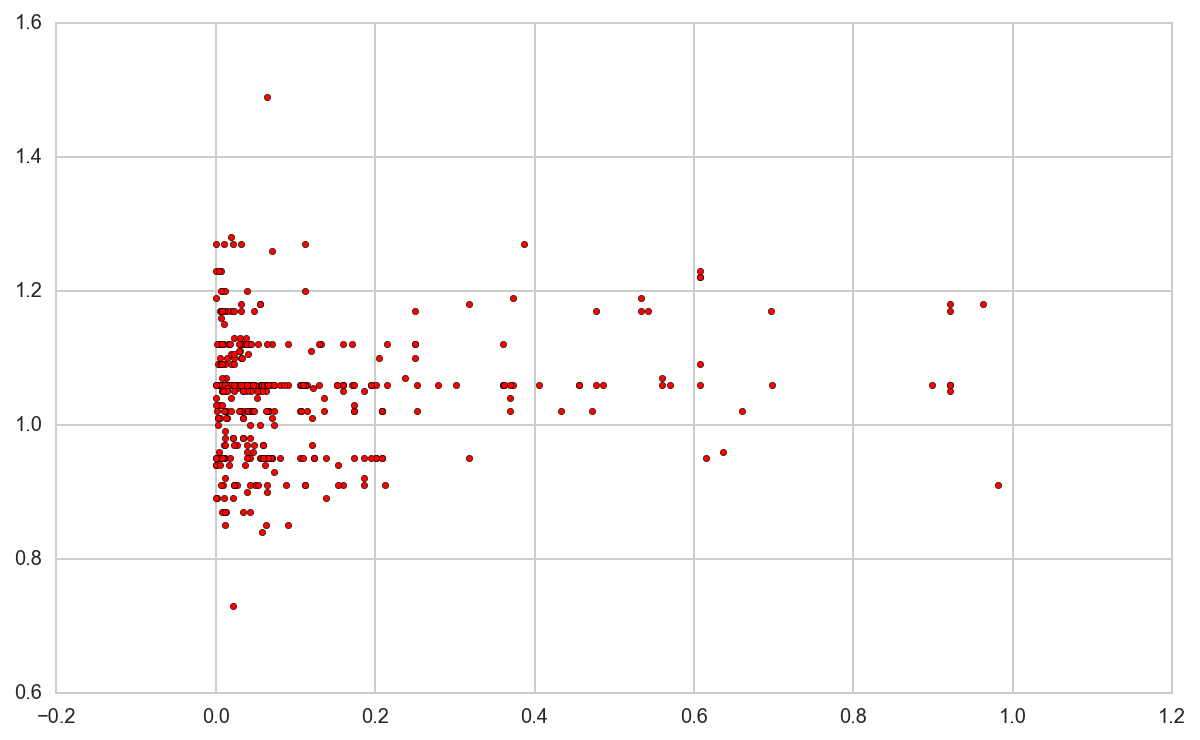

In [36]:
fig = plt.figure(figsize=(10,6))
plt.scatter(fast_food['prpblck'], fast_food['psoda'], s=10, c='r', marker='o')
plt.show()

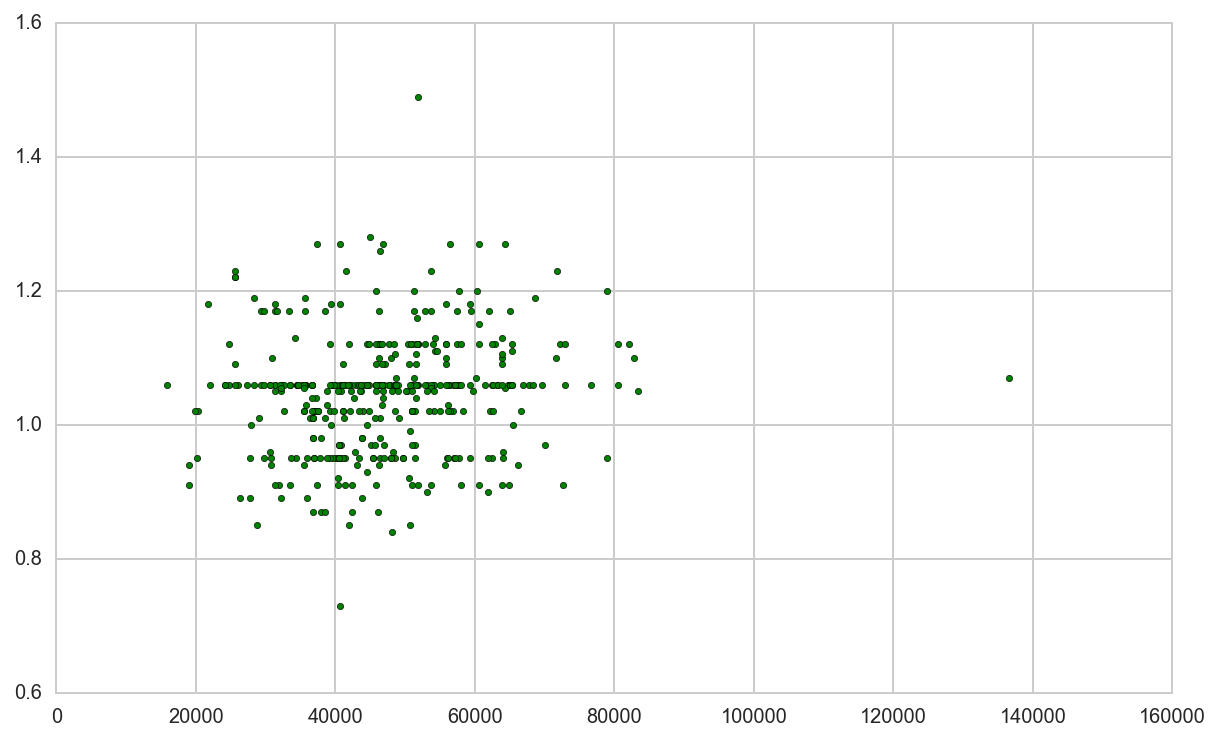

In [37]:
fig = plt.figure(figsize=(10,6))
plt.scatter(fast_food['income'], fast_food['psoda'], s=10, c='g', marker='o')
plt.show()

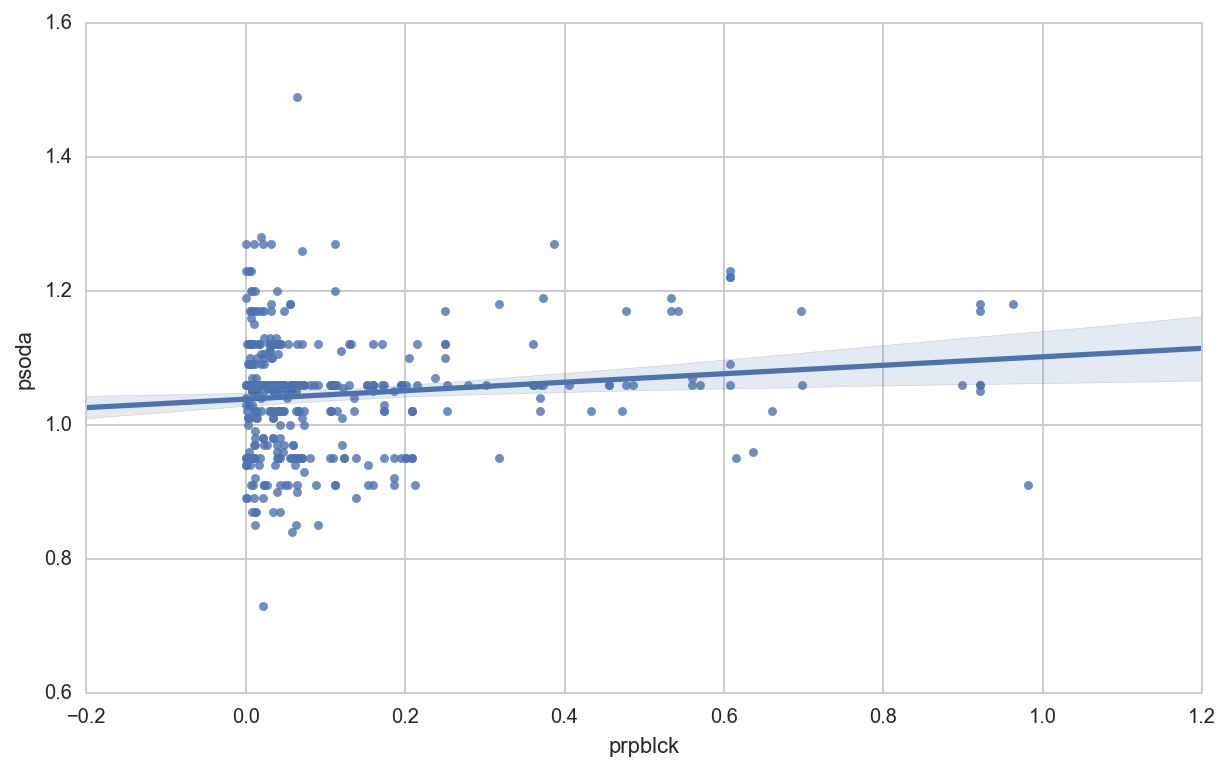

In [38]:
fig = plt.figure(figsize=(10,6))
sns.regplot(fast_food['prpblck'], fast_food['psoda'], data=fast_food)
plt.show()

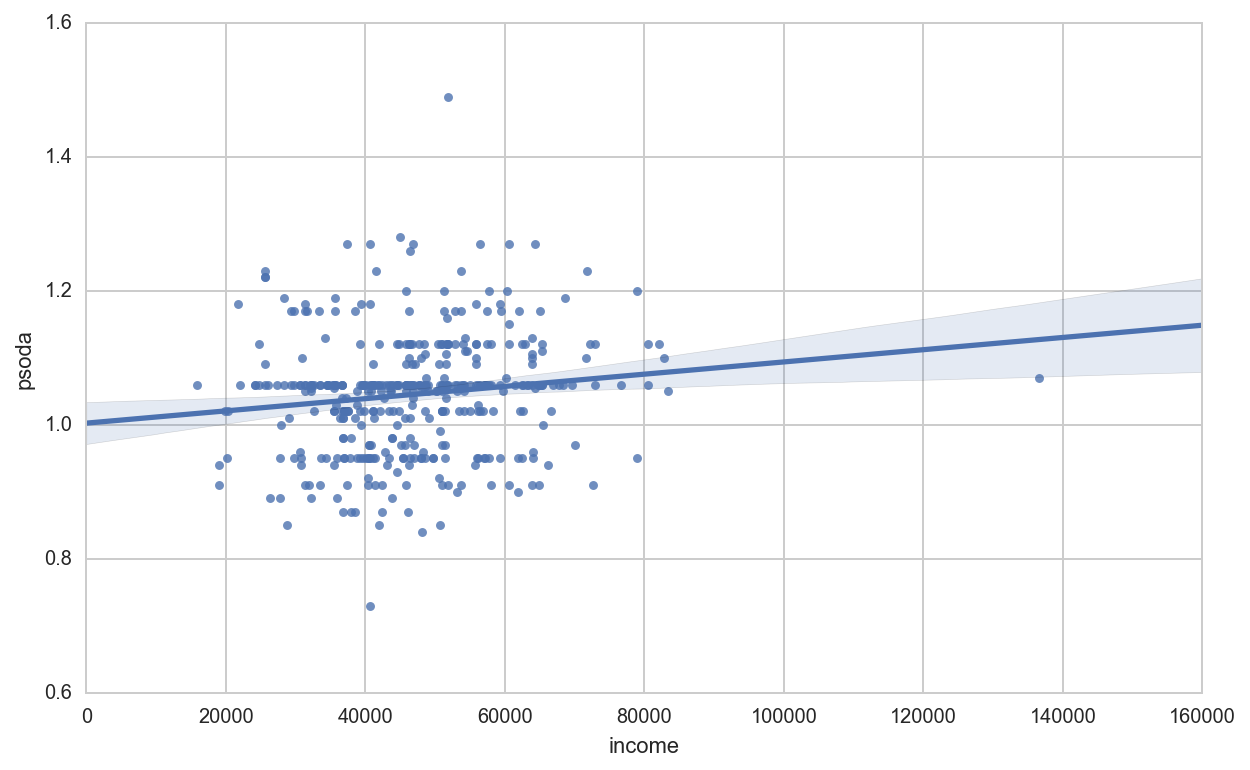

In [39]:
fig = plt.figure(figsize=(10,6))
sns.regplot(fast_food['income'], fast_food['psoda'], data=fast_food)
plt.show()

### Before you move to the next question, read this article "Why I'm not a fan of R-Squared"
http://www.johnmyleswhite.com/notebook/2016/07/23/why-im-not-a-fan-of-r-squared/

### Bonus
#### 11. Report the estimates of the follwing model (use sklearn):
    log(psoda) = β0 + β1prpblck + β2log(income) + e


In [40]:
## If there are missing observations on any of the log variables, would you dropped them
## from the dataset, if so how does this impact your calculations?
## Ans: When dropping missing observations,  we loose statistical power. 


## Fill the missing values of lpsoda with 0
fast_food['lpsoda'] = fast_food['lpsoda'].fillna(0)
fast_food['lpsoda'].isnull().sum()

0

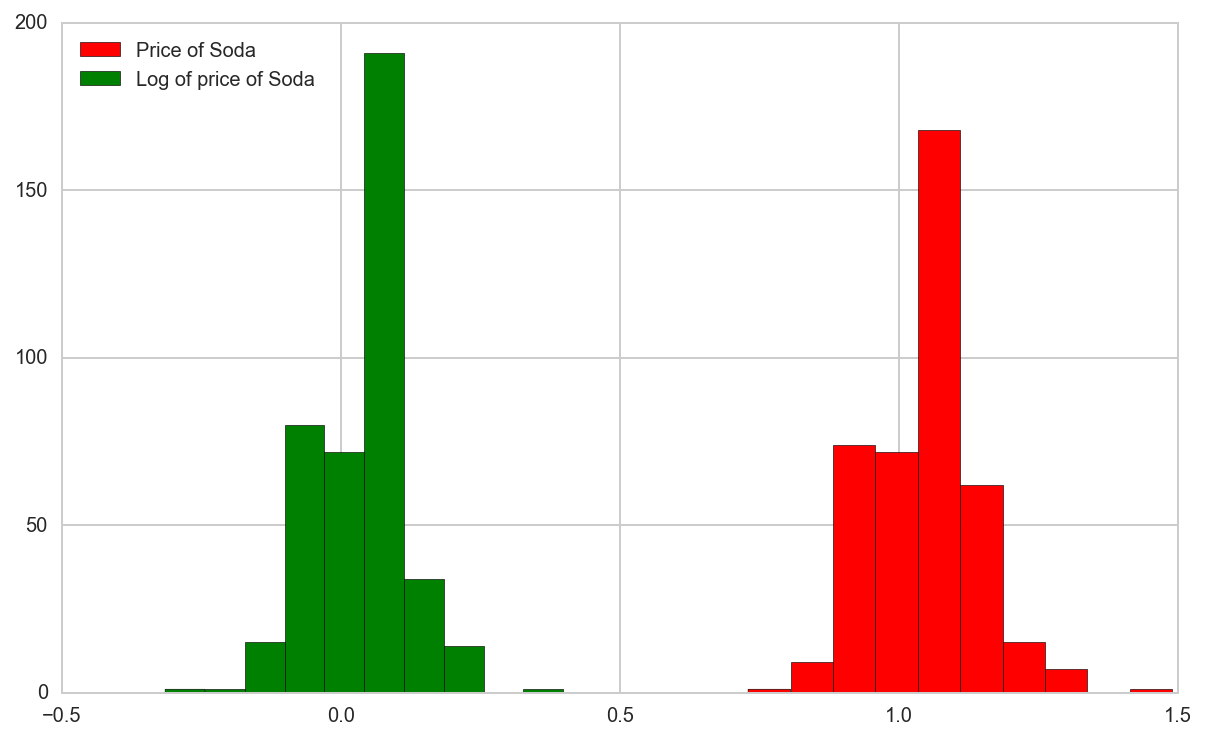

In [41]:
## Plot a histogram that will have 2 histograms showing the distribution of psoda and lpsoda
## Are they the same?
fig = plt.figure(figsize=(10,6))
fast_food['psoda'].hist(color='r', label='Price of Soda')
fast_food['lpsoda'].hist(color='g', label='Log of price of Soda')
plt.legend(loc='upper left')
plt.show()

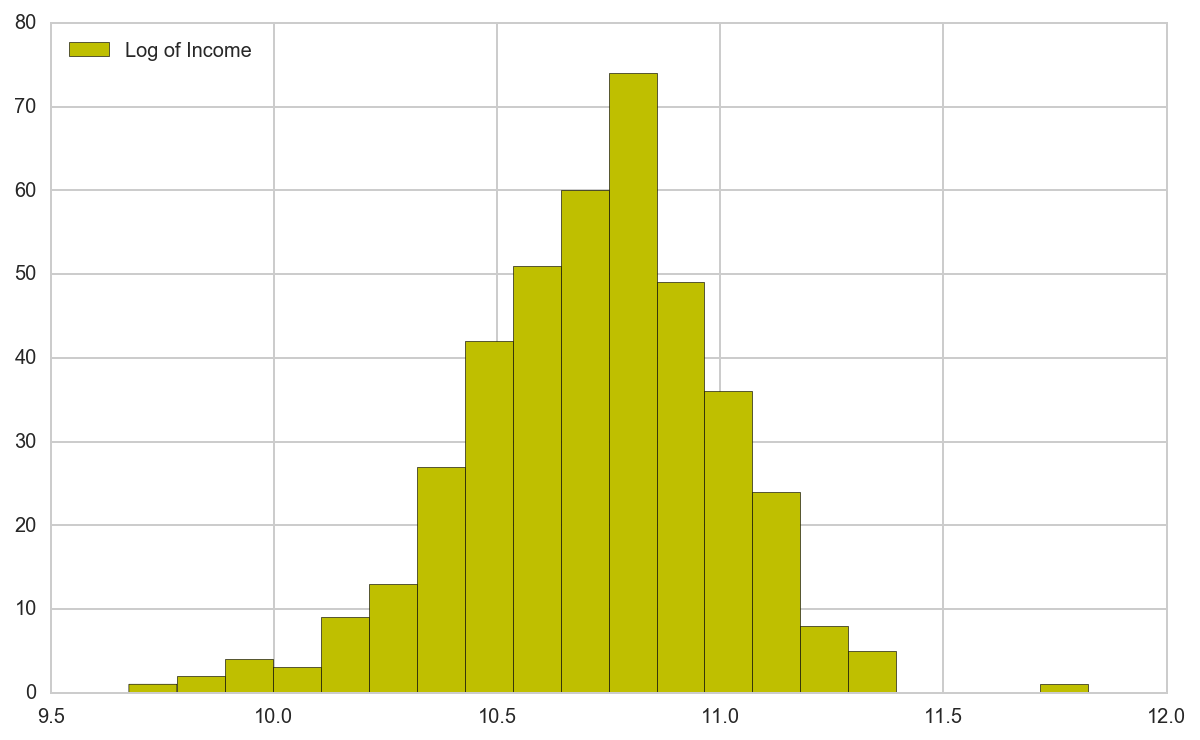

In [42]:
## Plot a histogram of the variable log of income (lincome)
fig = plt.figure(figsize=(10,6))
fast_food['lincome'].hist(color='y', label='Log of Income', bins=20)
plt.legend(loc='upper left')
plt.show()

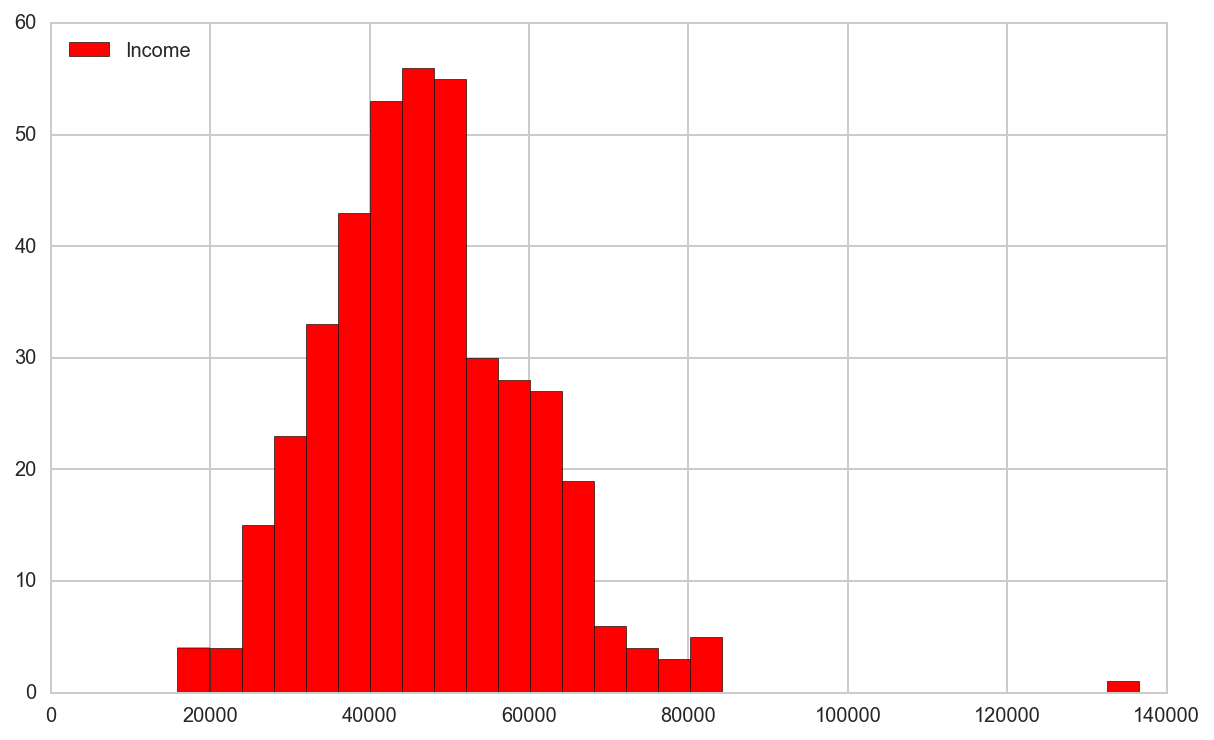

In [43]:
## Plot a histogram of the variable income 
fig = plt.figure(figsize=(10,6))
fast_food['income'].hist(color='r', label='Income', bins=30)
plt.legend(loc='upper left')
plt.show()

In [44]:
## Can you explain what log is doing to the variables (income, and price of soda (psoda))
## Ans: The idea is to have a normalized set of variables

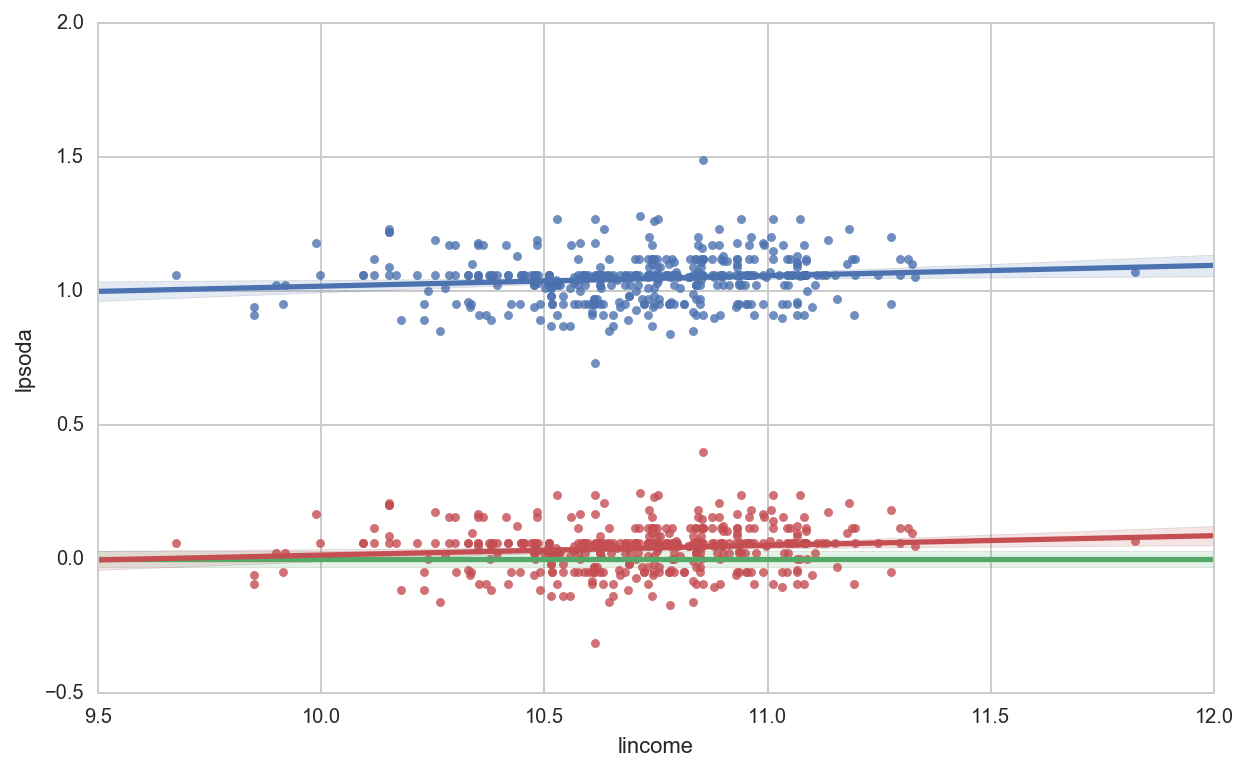

In [45]:
## In one graph use seaborn regplot to graph
## graph psoda, vs lincome
## graph lpsoda vs income
## graph lpsoda vs lincome
fig = plt.figure(figsize=(10,6))
sns.regplot(fast_food['lincome'], fast_food['psoda'], data=fast_food)
sns.regplot(fast_food['income'], fast_food['lpsoda'], data=fast_food)
sns.regplot(fast_food['lincome'], fast_food['lpsoda'], data=fast_food)
plt.show()

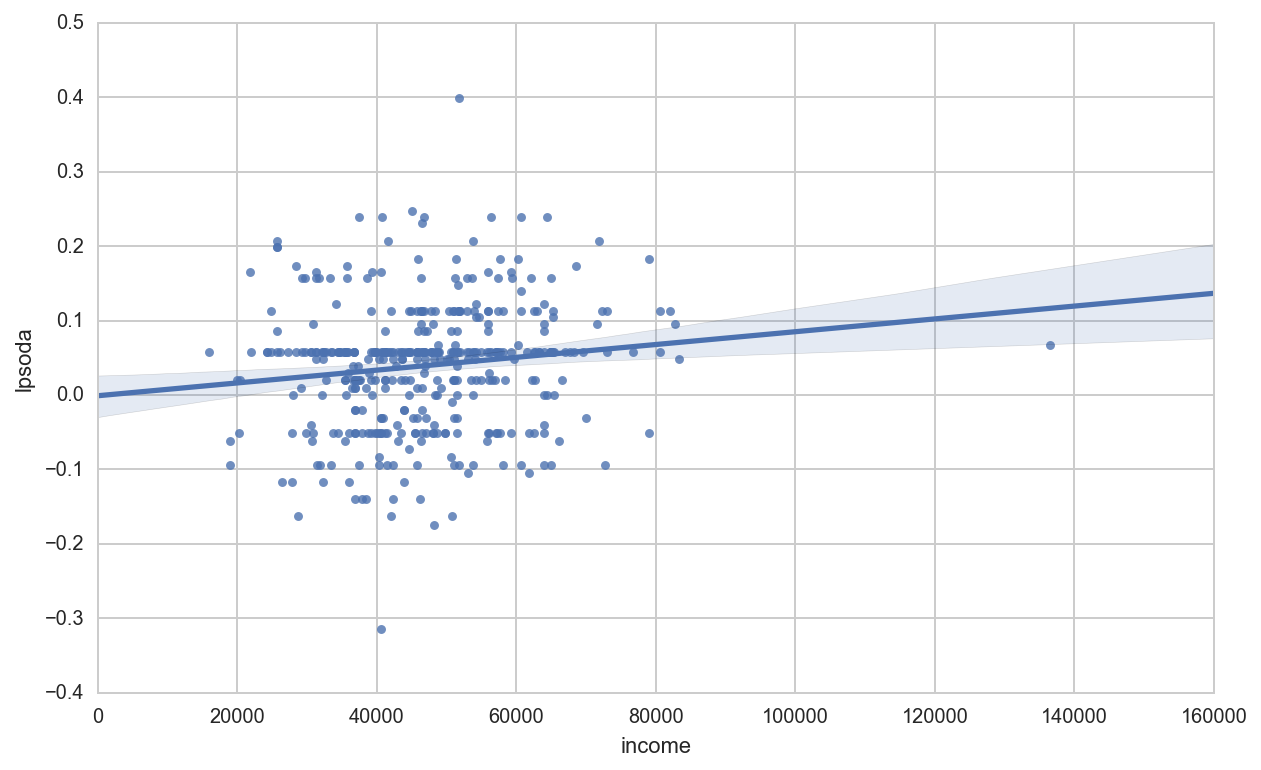

In [46]:
## graph lpsoda vs income
fig = plt.figure(figsize=(10,6))
sns.regplot(fast_food['income'], fast_food['lpsoda'], data=fast_food)
plt.show()

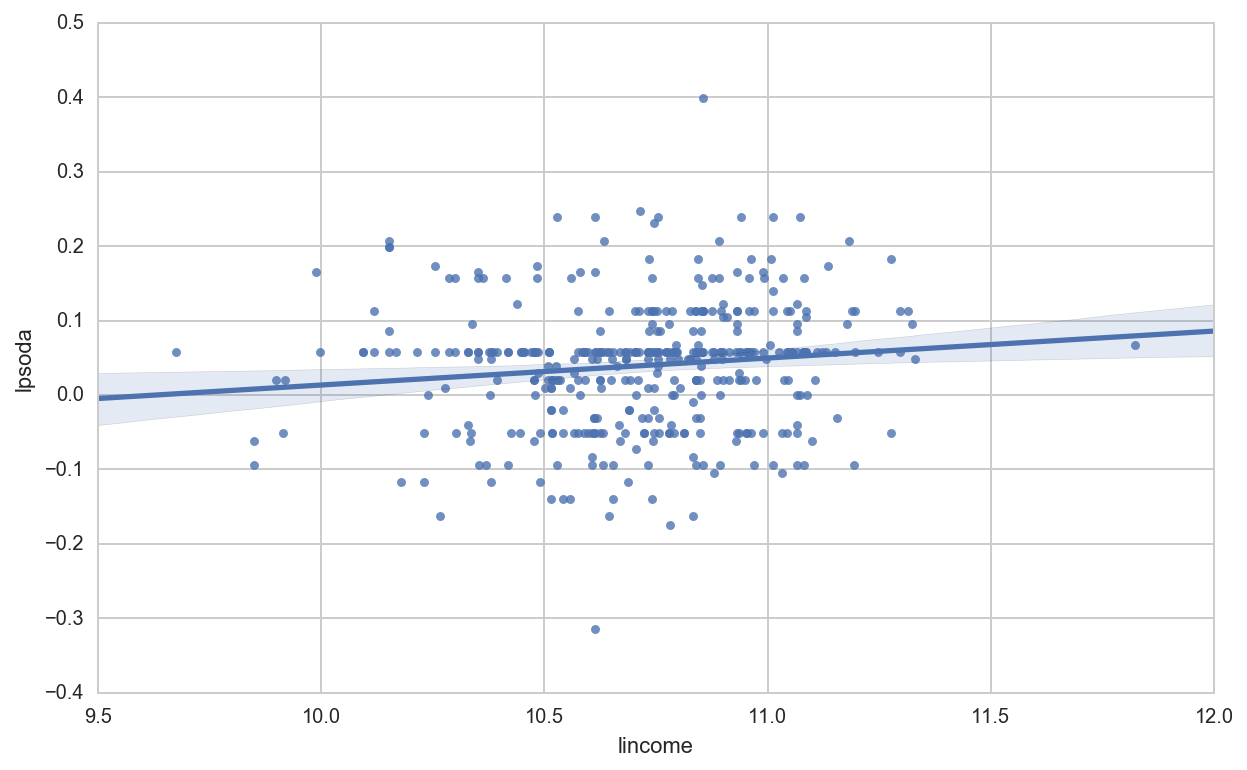

In [47]:
# graph lpsoda vs lincome
fig = plt.figure(figsize=(10,6))
sns.regplot(fast_food['lincome'], fast_food['lpsoda'], data=fast_food)
plt.show()

In [48]:
# Define your linear model 
lm = linear_model.LinearRegression()

# Define the target variable, called it y
target = 'lpsoda'
y = fast_food[target]


# Define your predictors, called them X
X = fast_food[['prpblck', 'lincome']]

# Print the shapes of your y and X
print y.shape, X.shape



(409,) (409, 2)


In [49]:
# Fit your model
model = lm.fit(X, y)

# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions
predictions = lm.predict(X)
predictions.shape

(409,)

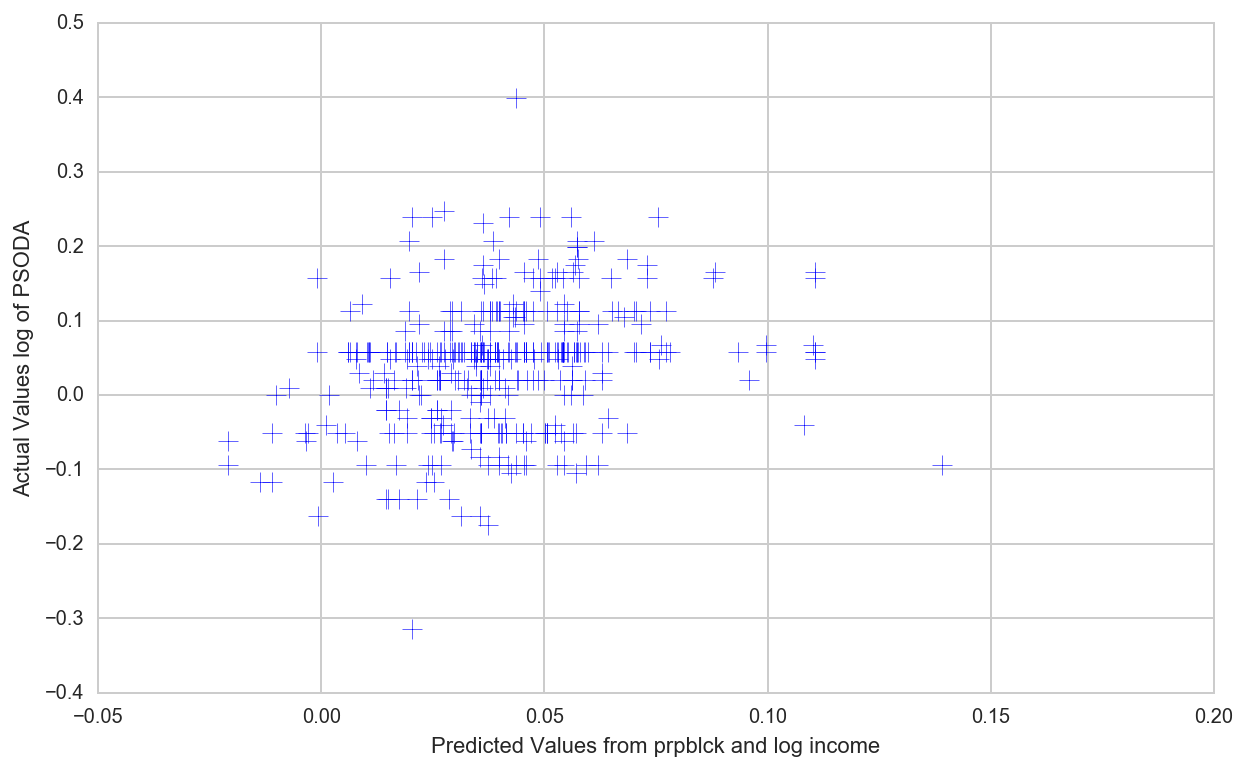

MSE: 0.00659013590169


In [50]:
## Graph your predicted and y values
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=100, c='b', marker='+')
plt.xlabel("Predicted Values from prpblck and log income")
plt.ylabel("Actual Values log of PSODA")
plt.show()

print "MSE:", mean_squared_error(y, predictions)

In [51]:
## Print the coefficients, and R2, interpret your result 
## See/read this link for interpretation of results/coeficients: 
## http://www.ats.ucla.edu/stat/mult_pkg/faq/general/log_transformed_regression.htm

print "R^2:", model.score(X, y)
print "Coefficients:", model.coef_
print "Intercept:", lm.intercept_

## Do you think that is model is more appropriate? 
## It is, as my dependent/y and independent/x/feature variables have a "normalize" form, which give us a 
## a better relationship and interpretation of the coefficients.

R^2: 0.0678276002316
Coefficients: [ 0.12219335  0.07517121]
Intercept: -0.780186681101


In [52]:
## Now add the variable prppov to the regression in question 11, What happened with prpblck?

# Define your linear model 
lm = linear_model.LinearRegression()

# Define the target variable, called it y
target = 'lpsoda'
y = fast_food[target]


# Define your predictors, called them X
X = fast_food[['prpblck', 'lincome', 'prppov']]

# Print the shapes of your y and X
print y.shape, X.shape

(409,) (409, 3)


In [53]:
# Fit your model
model = lm.fit(X, y)

# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions
predictions = lm.predict(X)
print predictions.shape

## Print the coefficients, and R2, interpret your result
print "R^2:", model.score(X, y)
print "Coefficients:", model.coef_
print "Intercept:", lm.intercept_

(409,)
R^2: 0.0859869068079
Coefficients: [ 0.07403069  0.13376281  0.37193965]
Intercept: -1.42933744468


In [54]:
## Find the correlatoion between log(income) and prpov. Is it close to what you expected?
cor_var = ['prppov', 'lincome']
fast_food[cor_var].corr()


,prppov,lincome
prppov,1.000000,-0.838467
lincome,-0.838467,1.000000


### What are your thoughts on this statement:
"Because log(income) and prppov are so highly correlated, they have no business in being included in the same regression"

##### This answer requires more exlanation/knowledge of Stats, but here are the escenarios:
https://onlinecourses.science.psu.edu/stat501/node/346

Effect #1
When predictor variables are correlated, the estimated regression coefficient of any 
one variable depends on which other predictor variables are included in the model.

Effect #2
When predictor variables are correlated, the precision of the estimated regression coefficients 
decreases as more predictor variables are added to the model.

Effect #3
When predictor variables are correlated, the marginal contribution of any one predictor variable in 
reducing the error sum of squares varies depending on which other variables are already in the model.

Effect #4
When predictor variables are correlated, hypothesis tests for βk = 0 may yield different conclusions 
depending on which predictor variables are in the model. (This effect is a direct consequence of the three 
previous effects.)

Effect #5
High multicollinearity among predictor variables does not prevent good, precise predictions of 
the response within the scope of the model.